In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r'E:\my document\Data Fellowship IYKRA\Module 4\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.shape

(1338, 7)

In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Charges Distribution')

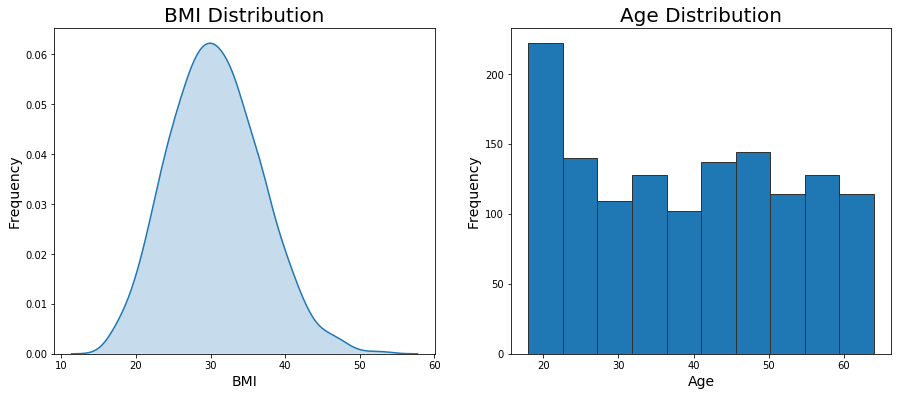

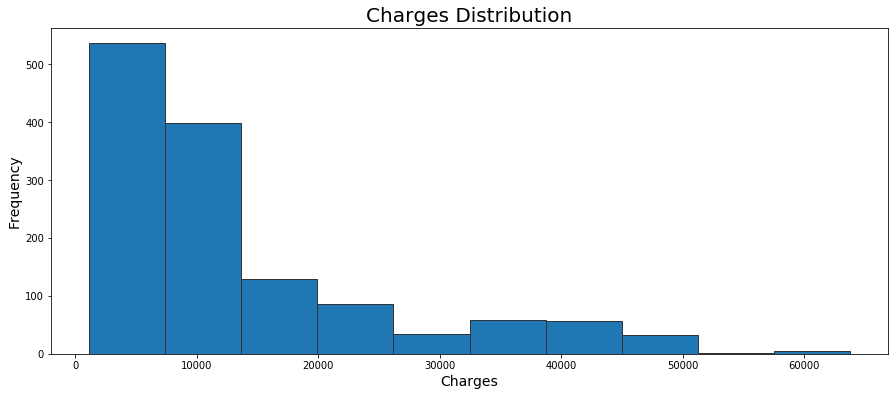

In [6]:
fig21, (ax21,ax22) = plt.subplots(1,2)
fig21.set_size_inches(15,6)

#Create a density curve of the BMI distribution
sns.kdeplot(df['bmi'], ax=ax21, shade=True, legend=False)
ax21.set_xlabel("BMI", fontsize=14)
ax21.set_ylabel("Frequency", fontsize=14)
ax21.set_title("BMI Distribution", fontsize=20)

#Create a histogram of the age distribution
ax22.hist('age', data=df, bins=10, edgecolor='0.2')
ax22.set_xlabel("Age", fontsize=14)
ax22.set_ylabel("Frequency", fontsize=14)
ax22.set_title("Age Distribution", fontsize=20)

#Create a separate subplot for the charges distribution
#This is because this is a more important graph, and is better to take up two columns
fig22, ax23 = plt.subplots()
fig22.set_size_inches(15,6)

#Create a histogram of the charges distribution
ax23.hist('charges', data=df, bins=10, edgecolor='0.2')
ax23.set_xlabel("Charges", fontsize=14)
ax23.set_ylabel("Frequency", fontsize=14)
ax23.set_title("Charges Distribution", fontsize=20)

In [7]:
from scipy.stats import skew

print("Skew of BMI    :  {}".format(round(skew(df['bmi']), 2)))
print("Skew of Age    :  {}".format(round(skew(df['age']), 2)))
print("Skew of Charges:  {}".format(round(skew(df['charges']), 2)))

Skew of BMI    :  0.28
Skew of Age    :  0.06
Skew of Charges:  1.51


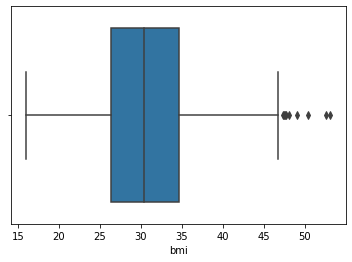

In [8]:
sns.boxplot(x=df['bmi'])

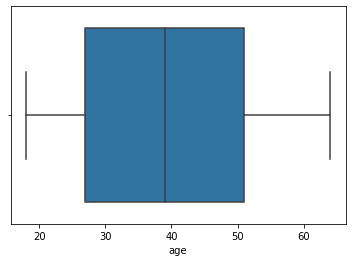

In [9]:
sns.boxplot(x=df['age'])

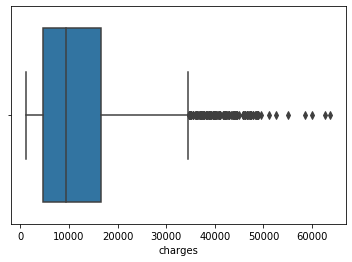

In [10]:
sns.boxplot(x=df['charges'])

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64

In [12]:
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR)).sum()

        age    bmi  charges  children  region    sex  smoker
0     False  False    False     False   False  False   False
1     False  False    False     False   False  False   False
2     False  False    False     False   False  False   False
3     False  False    False     False   False  False   False
4     False  False    False     False   False  False   False
...     ...    ...      ...       ...     ...    ...     ...
1333  False  False    False     False   False  False   False
1334  False  False    False     False   False  False   False
1335  False  False    False     False   False  False   False
1336  False  False    False     False   False  False   False
1337  False  False    False     False   False  False   False

[1338 rows x 7 columns]


age           0
bmi           9
charges     139
children      0
region        0
sex           0
smoker        0
dtype: int64

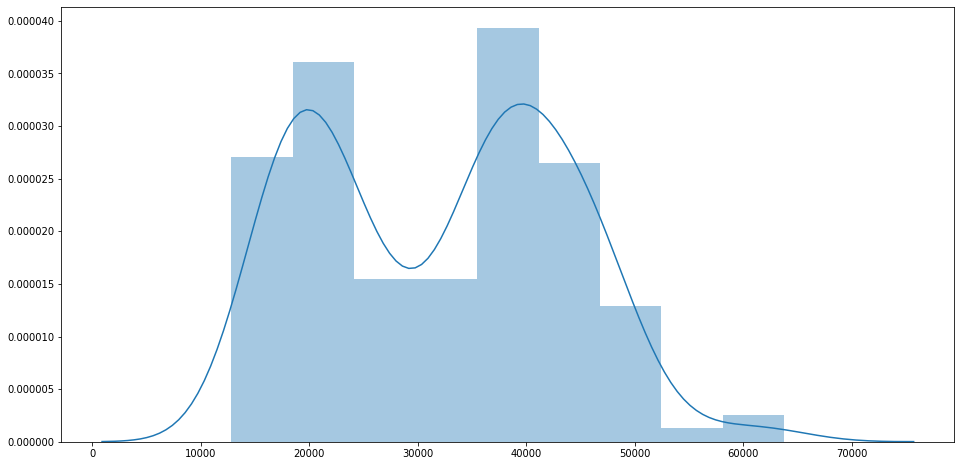

In [13]:
df_Smoker = np.array(df[df.smoker == 'yes']['charges'].reset_index().drop(columns={'index'}))
df_NonSmoker = np.array(df[df.smoker == 'no']['charges'].reset_index().drop(columns={'index'}))

fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
ax = sns.distplot(df_Smoker)

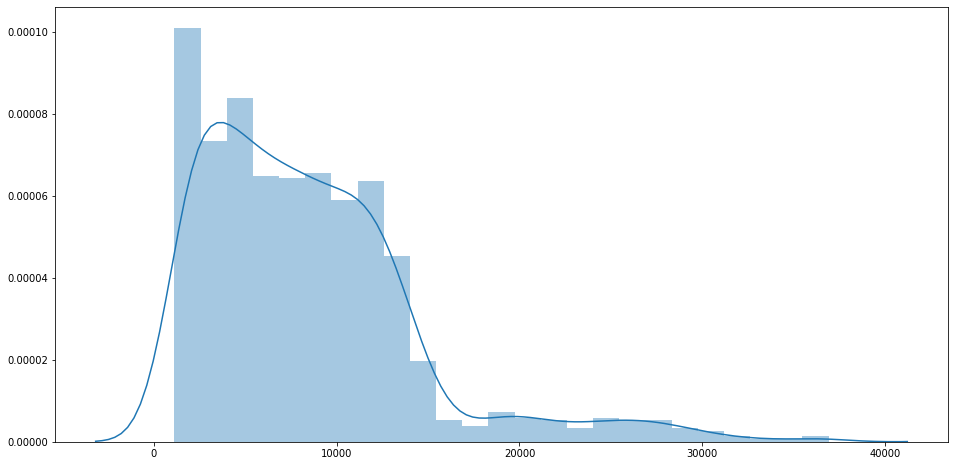

In [14]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
ax = sns.distplot(df_NonSmoker)

In [15]:
from statsmodels.stats.weightstats import ztest

t, p_val = ztest(df_Smoker, df_NonSmoker)

if p_val < 0.05:
  print('p value is {}. It smaller than alpha, so we reject H0. That means Smoker Charges is differ significantly than non Smoker'.format(p_val[0]))
else:
  print('p value is {}. It bigger than alpha, so we accept H0. That means Smoker charges is not differ significantly than non Smoker'.format(p_val[0]))

p value is 0.0. It smaller than alpha, so we reject H0. That means Smoker Charges is differ significantly than non Smoker
